In [1]:
import sys
sys.path.append("/Users/leah/Columbia/courses/19summer/SocialBehavior/SocialBehaviorptc")

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from project_ssms.grid_utils import plot_quiver

import joblib
import git

In [3]:
repo = git.Repo('.', search_parent_directories=True)  # SocialBehaviorectories=True)
repo_dir = repo.working_tree_dir  # SocialBehavior

In [4]:
data_dir = repo_dir + '/SocialBehaviorptc/data/trajs_all'
trajs = joblib.load(data_dir)

traj0 = trajs[36000 * 0:36000 * 1]
#traj0 = downsample(traj0, 2)

data = torch.tensor(traj0[2000:3000], dtype=torch.float64)

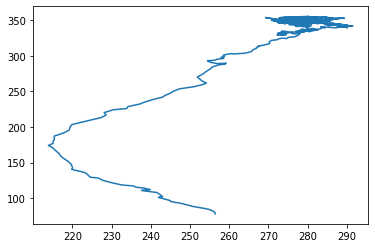

In [5]:
plt.plot(data[:,0].numpy(), data[:,1].numpy())


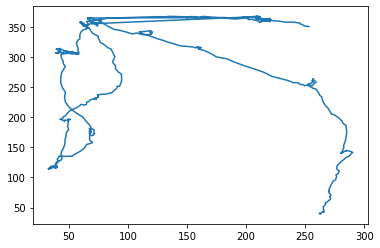

In [6]:
plt.plot(data[:,2].numpy(), data[:,3].numpy())


In [7]:
model = joblib.load("model")

In [8]:
torch.exp(model.observation.log_sigmas)

tensor([[1.2294, 1.1809, 1.7926, 1.5953],
        [0.8814, 1.0275, 0.6520, 0.5898],
        [5.5373, 6.6083, 7.2383, 8.1537],
        [1.5204, 1.6039, 1.6064, 1.5144]], dtype=torch.float64,
       grad_fn=<ExpBackward>)

In [9]:
losses = joblib.load("losses")

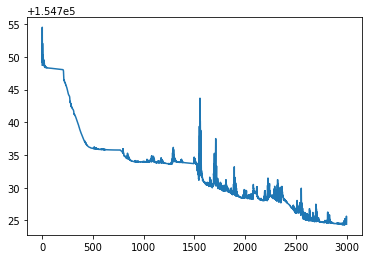

In [10]:
plt.plot(losses[0:])

In [20]:
z = joblib.load("z")

In [21]:
[np.sum(z==k) for k in range(4)]

[13272, 812, 3916, 0]

In [13]:
tran = model.observation.transformation

In [17]:
XX, YY = np.meshgrid(np.linspace(20, 310, 30),
                         np.linspace(0, 380, 30))
XY = np.column_stack((np.ravel(XX), np.ravel(YY)))  # shape (900,2) grid values
XY_grids = np.concatenate((XY, XY), axis=1)

XY_next = tran.transform(torch.tensor(XY_grids, dtype=torch.float64))
dXY = XY_next.detach().numpy() - XY_grids[:, None]

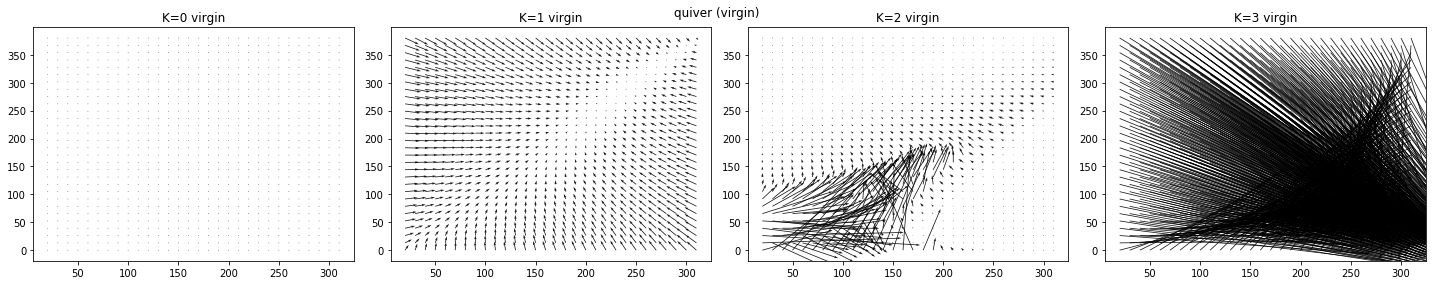

In [23]:
plot_quiver(XY_grids[:, 0:2], dXY[..., 0:2], 'virgin', K=4, scale=0.1, alpha=0.9,
                title="quiver (virgin)")